In [1]:
import numpy as np

# Representaciones de grafos
## Grafos como lista de vertices

In [2]:
grafo1 = [ [0,1], [0,6], [0,8], [1,4], [1,6], [1,9], [2,4], [2,6], [3,4], [3,5],
[3,8], [4,5], [4,9], [7,8], [7,9] ]


In [3]:
# ¿Cuales son los nodos?
nodos = lambda x: set(sum(x, []))
nodos(grafo1)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [4]:
# ¿Cuales son los vecinos de 4?
def vecinos_de(nodo):
  vertices =  [x for x in grafo1 if nodo in x]
  return [v[(v.index(nodo) + 1) % 2] for v in vertices] 
vecinos_de(4)

[1, 2, 3, 5, 9]

In [5]:
# ¿Cual es el grado de 2?

len(vecinos_de(2))


2

# Representacion de lista de adyacencias

In [6]:
# Convirtamos una representacion en la otra
from collections import defaultdict
def rep_lista(g):
  g_la = defaultdict(list)
  for x, y in g:
    g_la[x].append(y)
    g_la[y].append(x)
  return g_la

In [7]:
grafo2 = rep_lista(grafo1)
grafo2

defaultdict(list,
            {0: [1, 6, 8],
             1: [0, 4, 6, 9],
             2: [4, 6],
             3: [4, 5, 8],
             4: [1, 2, 3, 5, 9],
             5: [3, 4],
             6: [0, 1, 2],
             7: [8, 9],
             8: [0, 3, 7],
             9: [1, 4, 7]})

In [8]:
# ¿Cual es el grado de cada nodo?
{k: len(v) for k, v in grafo2.items()}

{0: 3, 1: 4, 2: 2, 3: 3, 4: 5, 5: 2, 6: 3, 7: 2, 8: 3, 9: 3}

# Representacion matricial

In [9]:
n = len(nodos(grafo1))
adyacencias = np.zeros((n,n))
for x, y in grafo1:
  adyacencias[x,y] = 1
  adyacencias[y,x] = 1
adyacencias

array([[0., 1., 0., 0., 0., 0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1., 0., 1., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 0., 0., 1., 0.],
       [0., 1., 1., 1., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [1., 0., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 1., 0., 0., 1., 0., 0.]])

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
df_ady = pd.DataFrame(adyacencias, index=nodos(grafo1), columns=nodos(grafo1), dtype=int)
df_ady

,0,1,2,3,4,5,6,7,8,9
0,0,1,0,0,0,0,1,0,1,0
1,1,0,0,0,1,0,1,0,0,1
2,0,0,0,0,1,0,1,0,0,0
3,0,0,0,0,1,1,0,0,1,0
4,0,1,1,1,0,1,0,0,0,1
5,0,0,0,1,1,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,1,1
8,1,0,0,1,0,0,0,1,0,0
9,0,1,0,0,1,0,0,1,0,0


In [30]:
n2 = np.linalg.matrix_power(df_ady, 3)
df_n2 = pd.DataFrame(n2, columns=df_ady.columns, index=df_ady.index)
df_n2

,0,1,2,3,4,5,6,7,8,9
0,2,6,2,1,4,2,5,1,5,3
1,6,4,2,3,9,2,7,2,3,6
2,2,2,0,1,7,1,5,1,2,2
3,1,3,1,2,7,4,3,1,5,3
4,4,9,7,7,4,6,2,2,3,7
5,2,2,1,4,6,2,2,2,1,2
6,5,7,5,3,2,2,2,2,1,3
7,1,2,1,1,2,2,2,0,4,4
8,5,3,2,5,3,1,1,4,0,2
9,3,6,2,3,7,2,3,4,2,2


In [19]:
import networkx as nx

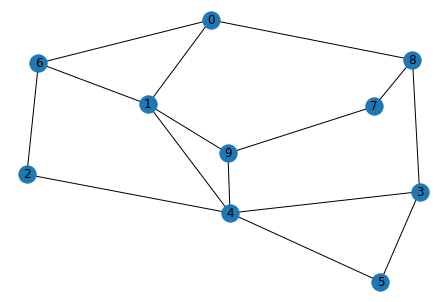

In [25]:
H = nx.from_pandas_adjacency(df_ady)

nx.draw_spring(H, with_labels=True)